In [15]:
# combined_analysis_data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

k7_june_july = pd.read_pickle('7_vs_17/combined_analysis_data_k7_index_june_july.pkl')

k17_june_july = pd.read_pickle('7_vs_17/combined_analysis_data_k17_index_june_july.pkl')
print(len(k17_june_july) == len(k7_june_july))

full_k17 = pd.read_pickle('combined_analysis_data.pkl') # that's Nick's file with lda k= 17 on full data
full_k17.head()

In [3]:
posts_df = pd.read_pickle('combined_bigquery_processed.pkl')
posts_df = posts_df[['id', 'created_utc']]

k7_june_july = k7_june_july.merge(posts_df, how = 'left', left_index = True, right_index = True)
print(k7_june_july['lda_0'].isnull().any())
print(k7_june_july['created_utc'].isnull().any())

k17_june_july = k17_june_july.merge(posts_df, how = 'left', left_index = True, right_index = True)
print(k17_june_july['lda_0'].isnull().any())
print(k17_june_july['created_utc'].isnull().any())

full_k17 = full_k17.merge(posts_df, how = 'left', left_index = True, right_index = True)
print(full_k17['lda_0'].isnull().any())
print(full_k17['created_utc'].isnull().any())

False
False
False
False
False
False


In [5]:
k7_june_july.head()

,lda_0,lda_1,lda_2,lda_3,lda_4,lda_5,lda_6,controversiality,gilded,sentiment,...,pt_score,moderator,downvoted_user,pt_user_count,pt_user_mean,deleted_user,log_nword,user_flair,id,created_utc
index,,,,,,,,,,,,,,,,,,,,,
2490481,0.236978,0.011111,0.011032,0.489304,0.011018,0.011024,0.229534,0,0,-0.366667,...,-1.207604,0,0,-0.214914,-0.420876,0,1.414973,1,etnu8c6,1563000434
2490482,0.262560,0.023917,0.238950,0.201655,0.023901,0.023909,0.225109,0,0,0.000000,...,0.171363,0,0,0.247121,1.785519,0,1.113943,1,esn5aqq,1562122947
2490483,0.784923,0.035839,0.035973,0.035886,0.035819,0.035781,0.035779,0,0,0.000000,...,-0.112168,0,0,0.298072,0.829723,0,0.778151,1,etueckf,1563210661
2490484,0.023938,0.023963,0.856532,0.023884,0.023884,0.023887,0.023912,0,0,0.000000,...,0.885040,0,0,0.984762,0.840029,0,1.000000,1,euipq2b,1563852711
2490485,0.017893,0.221252,0.017919,0.689132,0.017904,0.017905,0.017996,0,0,0.100000,...,0.790891,0,0,0.450655,1.779131,0,1.255273,1,ev9sjrv,1564330169


<ipython-input-18-a7f8591d7be7>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  means_topics_per_day = k7_june_july.groupby('day')['lda_0', 'lda_1', 'lda_2', 'lda_3', 'lda_4', 'lda_5', 'lda_6'].mean()
<ipython-input-18-a7f8591d7be7>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  means_topics_per_day = k17_june_july.groupby('day')['lda_0', 'lda_1', 'lda_2', 'lda_3', 'lda_4', 'lda_5',
<ipython-input-18-a7f8591d7be7>:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  means_topics_per_day = full_k17.groupby('day')['lda_0', 'lda_1', 'lda_2', 'lda_3', 'lda_4', 'lda_5',


<AxesSubplot:xlabel='day'>

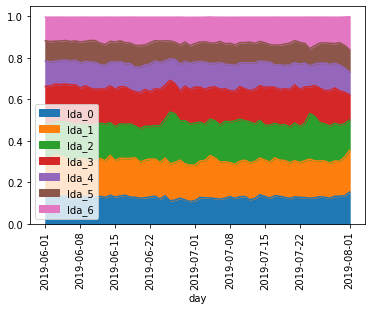

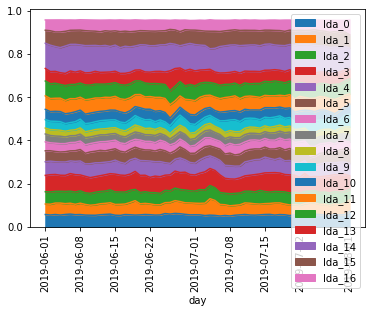

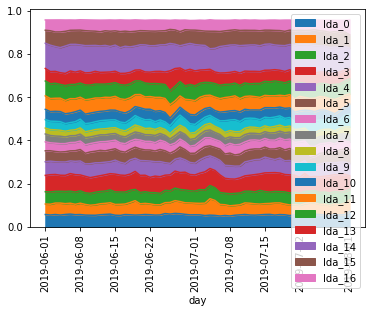

In [18]:
k7_june_july['date'] = pd.to_datetime(k7_june_july['created_utc'], unit='s')
k7_june_july['day'] = k7_june_july['date'].dt.date
means_topics_per_day = k7_june_july.groupby('day')['lda_0', 'lda_1', 'lda_2', 'lda_3', 'lda_4', 'lda_5', 'lda_6'].mean()
means_topics_per_day.head()
means_topics_per_day.plot.area(rot=90)

k17_june_july['date'] = pd.to_datetime(k17_june_july['created_utc'], unit='s')
k17_june_july['day'] = k17_june_july['date'].dt.date
means_topics_per_day = k17_june_july.groupby('day')['lda_0', 'lda_1', 'lda_2', 'lda_3', 'lda_4', 'lda_5',
                          'lda_6', 'lda_7', 'lda_8', 'lda_9', 'lda_10', 'lda_11',
                          'lda_12', 'lda_13', 'lda_14', 'lda_15', 'lda_16'].mean()
means_topics_per_day.head()
means_topics_per_day.plot.area(rot=90)

full_k17['date'] = pd.to_datetime(full_k17['created_utc'], unit='s')
full_k17['day'] = full_k17['date'].dt.date
means_topics_per_day = full_k17.groupby('day')['lda_0', 'lda_1', 'lda_2', 'lda_3', 'lda_4', 'lda_5',
                          'lda_6', 'lda_7', 'lda_8', 'lda_9', 'lda_10', 'lda_11',
                          'lda_12', 'lda_13', 'lda_14', 'lda_15', 'lda_16'].mean()
means_topics_per_day.head()
means_topics_per_day.plot.area(rot=90)

In [8]:
# Models themselves
import gensim.corpora as corpora
import gensim
k7_june_july_lda = gensim.models.LdaMulticore.load('lda_models/lda_7_topics')
k17_june_july_lda = gensim.models.LdaMulticore.load('lda_models/lda_17_topics')
k17_fulldata_lda = gensim.models.LdaMulticore.load('lda_models_fulldataset/lda_17_topics')

In [11]:
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric
    
print('\n\n-------------K = 7, june + july-------------')
for ind, topic in sorted(k7_june_july_lda.print_topics(num_words=10)):
    print('\nTopic: {} \nWords: {}'.format(ind, preprocess_string(topic, [strip_punctuation, strip_numeric])))
    
print('\n\n-------------K = 17, june + july-------------')
for ind, topic in sorted(k17_june_july_lda.print_topics(num_words=10)):
    print('\nTopic: {} \nWords: {}'.format(ind, preprocess_string(topic, [strip_punctuation, strip_numeric])))

print('\n\n-------------K = 17 full data-------------')
for ind, topic in sorted(k17_fulldata_lda.print_topics(num_words=10)):
    print('\nTopic: {} \nWords: {}'.format(ind, preprocess_string(topic, [strip_punctuation, strip_numeric])))



-------------K = 7, june + july-------------

Topic: 0 
Words: ['woman', 'lol', 'gay', 'white', 'look', 'kid', 'child', 'racist', 'men', 'black']

Topic: 1 
Words: ['shit', 'fuck', 'good', 'fucking', 'know', 'love', 'he', 'trump', 'man', 'want']

Topic: 2 
Words: ['one', 'time', 'post', 'ive', 'know', 'comment', 'never', 'reddit', 'sub', 'think']

Topic: 3 
Words: ['people', 'think', 'right', 'one', 'left', 'thing', 'want', 'u', 'world', 'american']

Topic: 4 
Words: ['state', 'law', 'every', 'free', 'government', 'make', 'people', 'u', 'country', 'need']

Topic: 5 
Words: ['year', 'money', 'million', 'company', 'pay', 'take', 'ago', 'time', 'buy']

Topic: 6 
Words: ['trump', 'democrat', 'president', 'vote', 'coat', 'party', 'obama', 'election', 'republican', 'war']


-------------K = 17, june + july-------------

Topic: 0 
Words: ['shit', 'fucking', 'coat', 'fuck', 'video', 'welcome', 'ive', 'hell', 'link', 'ever']

Topic: 1 
Words: ['love', 'thank', 'maga', 'damn', 'trump', 'win', 

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt

pyLDAvis.enable_notebook()
posts_df = pd.read_pickle('sampled_processed_extant_posts_june_july.pkl') # note that it's june+july, full needs full data
id2word = corpora.Dictionary(posts_df['tokens_lemma'])
corpus = [id2word.doc2bow(text) for text in posts_df['tokens_lemma']]

gensimvis.prepare(k7_june_july_lda, corpus, id2word)
gensimvis.prepare(k17_june_july_lda, corpus, id2word)

